In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pos = [x for x in range(1,11)]
post = ["Pasante de Desarrollo",
 "Desarrollador Junior",
 "Desarrollador Intermedio",
 "Desarrollador Senior",
 "Líder de Proyecto",
 "Gerente de Proyecto",
 "Arquitecto de Software",
 "Director de Desarrollo",
 "Director de Tecnología",
 "Director Ejecutivo (CEO)"]
salary = [1200.0, 2500.0, 4000.0, 4800.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0]

In [3]:
data = {
    'position': post,
    'years': pos,
    'salary': salary
}

data = pd.DataFrame(data)
data.head()

,position,years,salary
0,Pasante de Desarrollo,1,1200.0
1,Desarrollador Junior,2,2500.0
2,Desarrollador Intermedio,3,4000.0
3,Desarrollador Senior,4,4800.0
4,Líder de Proyecto,5,6500.0


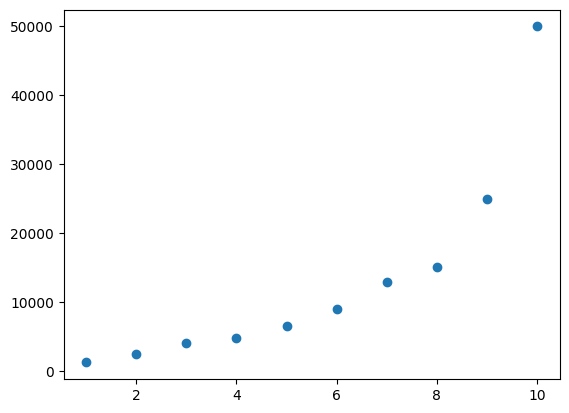

In [4]:
plt.scatter(data['years'], data['salary'])
plt.show()

## Extracción de la variable dependiente e independiente

**reshape(-1, 1)** se utiliza para cambiar la forma del arreglo de una dimensión a dos dimensiones, donde el número de filas se ajusta automáticamente (-1) y el número de columnas se establece en 1. Esto es comúnmente necesario cuando trabajas con modelos de regresión, ya que muchas bibliotecas de machine learning esperan que **'X'** sea un arreglo bidimensional donde cada fila representa una observación y cada columna una característica.

In [5]:
X = data.iloc[:, 1].values.reshape(-1,1)
y = data.iloc[:, -1].values

No dividimos el conjunto de datos entre el conjunto de testing y entrenamiento porque sabemos que no tenemos muchas datos, por lo que puede llegar a ser contraproducente el utilizar la división del conjunto para entrenar el algoritmo.

In [6]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

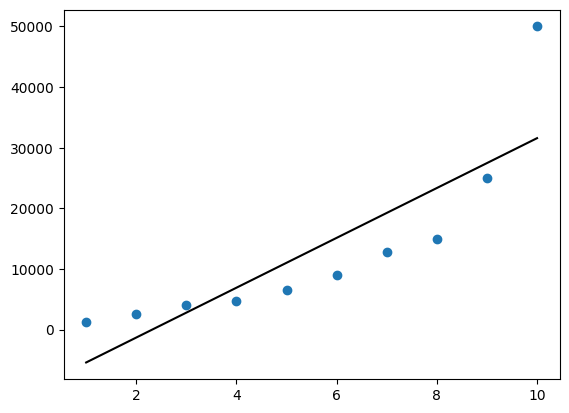

In [7]:
plt.scatter(data['years'], data['salary'])
plt.plot(X, regression.predict(X), color = "black")
plt.show()

In [8]:
regression.predict([[2]])

array([-1305.33333333])

# Regresión Polinómica

La regresión polinómica es un método de modelado en estadística y aprendizaje automático que se utiliza para modelar relaciones no lineales entre variables independientes y una variable dependiente. A diferenia de la regresión lineal, que asume una relación lineal entre las variables, la regresión polinómica permite capturar relaciones más complejas mediante la introducción de términos polinómicos.

Se observa que la relación entre las variables independientes y la variable dependiente no es lineal, es decir, no puede ser aproximada de manera efectiva por una línea recta en un gráfico de dispersión, entonces se puede considerar la regresión polinómica. La regresión polinómica puede capturar relaciones más complejas, como curvas, crecimiento exponencial o decreciente, y otros patrones no lineales.

El parámetro **'degree'** se establece en 4 en este caso, lo que significa que se generará características polinómicas hasta el cuarto grado. X^0, X^1, X^2, X^3, X^4.

Se crea una primer columna de 1 en la matriz resultante debido a un comportamiento estándar en la transformación de características de la regresión polinómica y, en general, en muchas bibliotecas de aprendizaje automático. Esto se hace para tener en cuenta el término constante o el "intercepto" en el modelo de regresión.

Incluir el término constante es importante porque permite al modelo ajustar el nivel base o el valor medio de la variable dependiente cuando todas las variables independientes son iguales a cero. Esta columna sirve para representar el término constante. Esto se conoce como la "columna de sesgo" o "columna de intercepto".

Con esta columna nos aseguramos de que el modelo de regresión polinómica tenga en cuenta el término constante en la ecuación del modelo y sea capaz de ajustar adecuadamente la parte vertical (intercepto) de la curva polinómica de los datos.

In [9]:
# Regresion Polinímica
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [10]:
regression_2 = LinearRegression()
regression_2.fit(X_poly, y)

LinearRegression()

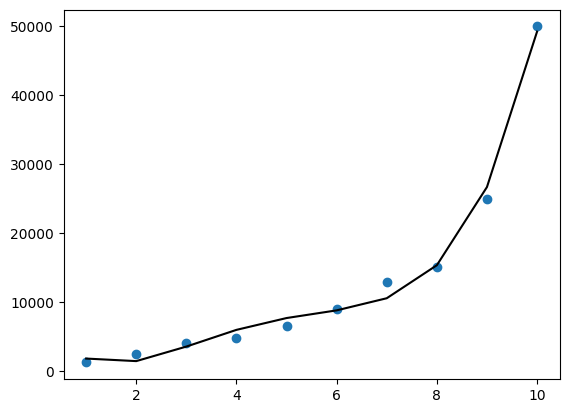

In [11]:
plt.scatter(X, y)
plt.plot(X, regression_2.predict(X_poly), color = "black")
plt.show()

In [12]:
predict = poly.fit_transform([[2]])
regression_2.predict(predict)

array([1398.34498834])

In [13]:
# R-Squared
from sklearn.metrics import r2_score

y_pred = regression_2.predict(X_poly)
r_squared = r2_score(y, y_pred)
r_squared

0.9933186366907111